<a href="https://colab.research.google.com/github/JoshCast777/WordCloud_Python/blob/WordCloud_4/WordCloud_Process.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nube de Palabras
-----
Se genera la nube de palabras basada en los votos que asignan a cada etiqueta del perfil de un usuario de StackOverflow en español.

	----------------------------------------------
	PROYECTO DEL PRIMER PARCIAL - NUBE DE PALABRAS
	----------------------------------------------

Integrantes:
--Castillo Riofrío Miguel Joshua
--Navarro Garzón Bruce Fabricio
--Velásquez Chóez Kevin Andrés

Debe introducir el ID de un usuario de StackOverflow en español,
de lo contrario, no correrá correctamente.
De los usuario en https://es.stackoverflow.com/users/

Ingrese el ID del usuario de StackOverflow en español: 95

El scraping se realiza desde la página https://es.stackoverflow.com/users/95?tab=tags&sort=votes&page=1

Se recogieron las etiquetas y votos
El usuario posee 679 etiquetas en su perfil.

	NUBE DE PALABRAS


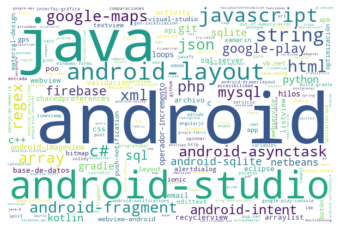

In [74]:
#Se importan las librerías
import requests as rq
import matplotlib.pyplot as plt
import os
from bs4 import BeautifulSoup as bs
from wordcloud import WordCloud

#Se crean las listas
tg=list()
vt=list()

#Presentación
print("\t----------------------------------------------")
print("\tPROYECTO DEL PRIMER PARCIAL - NUBE DE PALABRAS")
print("\t----------------------------------------------\n")

print('''Integrantes:
--Castillo Riofrío Miguel Joshua
--Navarro Garzón Bruce Fabricio
--Velásquez Chóez Kevin Andrés\n''')

print('''Debe introducir el ID de un usuario de StackOverflow en español,
de lo contrario, no correrá correctamente.
De los usuario en https://es.stackoverflow.com/users/''')

#Se ingresa el ID del usuario
id=input("\nIngrese el ID del usuario de StackOverflow en español: ")

#Se empieza a realizar el web scraping
cont=0
while True:
  
  #Se guarda el link de la página
  url='https://es.stackoverflow.com/users/'+id+'?tab=tags&sort=votes&page='+str(cont+1)
  
  #Para que muestre el link solo en la primera iteración
  if cont==0:
    print("\nEl scraping se realiza desde la página "+url+"\n")
  
  #Obtiene el contenido de la página
  page=rq.get(url)
  soup=bs(page.content, 'html.parser')
  pag=soup.find('div', class_='s-pagination--item is-selected')
  
  #Esto solo para que pag!=None en la primera iteración en páginas sin paginación
  if pag==None and cont==0:
    pag='a'
  if pag!=None:
  
    #Manejo de excepción por si el usuario no existe
    try:
      #Se guardan las etiquetas y los votos
      tagTable=soup.find('table', class_='user-tags')
      tags=tagTable.find_all('a', class_='post-tag')
      votes=tagTable.find_all('div', class_='answer-votes')
      
      #Se guardan las etiquetas y votos en una lista por separados
      for i in tags:
        tg.append(i.text)
      for i in votes:
        aux=''
        if i.text=='0':
          vt.append(0.001)
        else:
          for j in i.text:
            if j!='k' and j!='m':
              aux+=j
            else:
              if j=='k':
                aux=int(aux)*10**3
              if j=='m':
                aux=int(aux)*10**6
          vt.append(int(aux))
    except:
      print("No se encontró al usuario. Probablemente no sea usuario de StackOverflow en español o no existe")
    cont+=1
  else:
    break

if tg!=[]:
  print("Se recogieron las etiquetas y votos")

  #Se transforma la lista de votos a tupla
  print("El usuario posee "+str(len(tg))+" etiquetas en su perfil.\n")
  vt_T=tuple(vt)

  #Se crea el diccionario de datos con las etiquetas y los votos
  dic=dict(zip(tg, vt_T))

  #Se genera la nube de palabras
  print("\tNUBE DE PALABRAS")
  wc=WordCloud(background_color="#fff", width=600, height=400).generate_from_frequencies(dic)
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  plt.show()